In [1]:
from google.colab import files
uploaded = files.upload()

Saving GP Orders - 2.csv (1).zip to GP Orders - 2.csv (1).zip


In [2]:
from google.colab import files
uploaded = files.upload()

Saving GP Orders - 4.csv to GP Orders - 4.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving GP Orders - 5.csv to GP Orders - 5.csv


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
from plotly import tools
from plotly.offline import iplot

In [5]:
data = pd.read_csv("GP Orders - 5.csv", sep=",", encoding="utf_8")
data.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0


In [6]:
#exploring number of rows and columns in data
data.shape

(19239, 8)

In [7]:
#Analyse all column names.
data.columns

Index(['Order Number', 'Order Status', 'Book Name', 'Order Date & Time',
       'City', 'Payment Method', 'Total items', 'Total weight (grams)'],
      dtype='object')

In [8]:
#Rename column name in suitable formate.
data = data.rename(columns = {'Order Number' : 'Order_Number' , 'Order Status' : 'Order_Status' , 'Book Name' : 'Book_Name' , 'Order Date & Time' : 'Order_Date_Time' , 'City' : 'City_Order', 'Payment Method' : 'Payment_Method', 'Total items' : 'Total_Items', 'Total weight (grams)' : 'Total_weight(gm)'})

In [9]:
#Checking if column names are changed.
data.columns


Index(['Order_Number', 'Order_Status', 'Book_Name', 'Order_Date_Time',
       'City_Order', 'Payment_Method', 'Total_Items', 'Total_weight(gm)'],
      dtype='object')

In [10]:
#Exploring Unique values under all column heads.
data.nunique()

Order_Number        19239
Order_Status            3
Book_Name            3525
Order_Date_Time     18100
City_Order           4163
Payment_Method          5
Total_Items            51
Total_weight(gm)       63
dtype: int64

In [11]:
#Getting information about data and data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_Number      19239 non-null  int64  
 1   Order_Status      19239 non-null  object 
 2   Book_Name         19237 non-null  object 
 3   Order_Date_Time   19239 non-null  object 
 4   City_Order        19238 non-null  object 
 5   Payment_Method    19229 non-null  object 
 6   Total_Items       19239 non-null  int64  
 7   Total_weight(gm)  19239 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [12]:
#Changing Data type of order date and time.
data["Order_Date_Time"] = pd.to_datetime(data["Order_Date_Time"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_Number      19239 non-null  int64         
 1   Order_Status      19239 non-null  object        
 2   Book_Name         19237 non-null  object        
 3   Order_Date_Time   19239 non-null  datetime64[ns]
 4   City_Order        19238 non-null  object        
 5   Payment_Method    19229 non-null  object        
 6   Total_Items       19239 non-null  int64         
 7   Total_weight(gm)  19239 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.2+ MB


In [13]:
#Describing some important statistics about data.
data.describe()


,Order_Number,Total_Items,Total_weight(gm)
count,19239.000000,19239.000000,19239.000000
mean,52535.780238,6.051874,363.749675
std,15835.761148,576.938452,834.097325
min,307.000000,0.000000,200.000000
25%,48064.500000,1.000000,200.000000
50%,56436.000000,1.000000,200.000000
75%,63779.500000,1.000000,500.000000
max,71420.000000,80022.000000,55000.000000


In [14]:
#Looking for null values in data.
data.isnull().sum().sort_values(ascending = False)

Payment_Method      10
Book_Name            2
City_Order           1
Total_weight(gm)     0
Total_Items          0
Order_Date_Time      0
Order_Status         0
Order_Number         0
dtype: int64

In [15]:
#Dropping and rechecking null values.
data.dropna(inplace = True)
data.isnull().sum()

Order_Number        0
Order_Status        0
Book_Name           0
Order_Date_Time     0
City_Order          0
Payment_Method      0
Total_Items         0
Total_weight(gm)    0
dtype: int64

In [16]:
#Preprocess Billing_City
data['City_Order'] = data['City_Order'].str.lower()
data['City_Order'] = data['City_Order'].str.replace('\d+', '')
data['City_Order'] = data['City_Order'].str.replace('pakistan', '')
data['City_Order'] = data['City_Order'].str.replace('city', '')
data['City_Order'] = data['City_Order'].str.replace('?', '')
data['City_Order'] = data['City_Order'].str.strip()
#preprocess Book_Name
data['Book_Name'] = data['Book_Name'].str.replace("- مستحقین زکواة", "")
data['Book_Name'] = data['Book_Name'].str.lower()
data['Book_Name'] = data['Book_Name'].str.replace("linux - an introduction  (release data - october 3, 2020)", "linux - an introduction")
data['Book_Name'] = data['Book_Name'].str.replace("python programming- release date: august 14, 2020", "python programming")
data['Book_Name'] = data['Book_Name'].str.replace("ڈیٹا سائنس ۔ ایک تعارف", "ڈیٹا سائنس")
data['Book_Name'] = data['Book_Name'].str.replace("(C++)","(C++) ++سی/سی")
data['Book_Name'] = data['Book_Name'].str.replace("molo masali - مولو مصلی", "molo masali")
data['Book_Name'] = data['Book_Name'].str.replace("مشین ل", "مشین لرننگ")
data['Book_Name'] = data['Book_Name'].str.replace("مشین لرننگرننگ", "مشین لرننگ")
data['Book_Name'] = data['Book_Name'].str.replace("r ka taaruf آر کا تعارف", "r ka taaruf")
data['Book_Name'] = data['Book_Name'].str.strip()
df.sample(20)
df = df.assign(Order_Books_Name=df.Book_Name.str.split("/")).explode("Book_Name")

error: ignored

In [17]:
#Featuring date column
data['Dateofmonth'] = data['Order_Date_Time'].dt.day
data['Month'] = data['Order_Date_Time'].dt.month
data['Week'] = data['Order_Date_Time'].dt.week
data['Dayofweek'] = data['Order_Date_Time'].dt.dayofweek # 0 = monday.
data['Weekdayflg'] = (data['Dayofweek'] // 5 != 1).astype(float)
data['Month'] = data['Order_Date_Time'].dt.month
data['Quarter'] = data['Order_Date_Time'].dt.quarter
data['Dayofyear'] = data['Order_Date_Time'].dt.dayofyear
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Order_Number,Order_Status,Book_Name,Order_Date_Time,City_Order,Payment_Method,Total_Items,Total_weight(gm),Dateofmonth,Month,Week,Dayofweek,Weekdayflg,Quarter,Dayofyear
1,308,Completed,kaggle for begginers,2019-10-03 15:54:00,rawalpindi,Cash on Delivery (COD),1,200.0,3,10,40,3,1.0,4,276
2,309,Completed,kaggle for begginers/bitcoin blockchain aur cr...,2019-10-03 16:09:00,hyderabad,Cash on Delivery (COD),2,200.0,3,10,40,3,1.0,4,276
3,310,Cancelled,kaggle for begginers,2019-10-03 16:42:00,rawalpindi,Cash on Delivery (COD),1,200.0,3,10,40,3,1.0,4,276
4,311,Completed,bit coin block chain aur crypto currency بٹ کو...,2019-10-03 16:44:00,karachi,Cash on Delivery (COD),1,200.0,3,10,40,3,1.0,4,276
5,312,Completed,bit coin block chain aur crypto currency بٹ کو...,2019-10-03 18:17:00,fsd,Cash on Delivery (COD),5,200.0,3,10,40,3,1.0,4,276


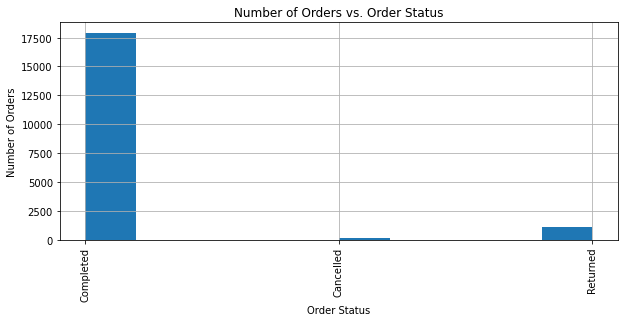

In [18]:
plt.figure(figsize = (10,4))
visual = data.Order_Status.hist()
plt.xticks(rotation = 90, horizontalalignment = "center")
plt.title("Number of Orders vs. Order Status")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.show()

In [19]:
#replace entries with COD instead of many.
data['Payment_Method'].replace({'Cash on Delivery (COD)':'Cash on delivery'}, inplace=True)
data['Payment_Method'] = data['Payment_Method'].fillna('Cash on delivery')

In [20]:
#Finding number of orders in each payment method.
data.Payment_Method.value_counts()

Cash on delivery    17477
EasyPaisa             696
JazzCash              596
BankTransfer          457
Name: Payment_Method, dtype: int64

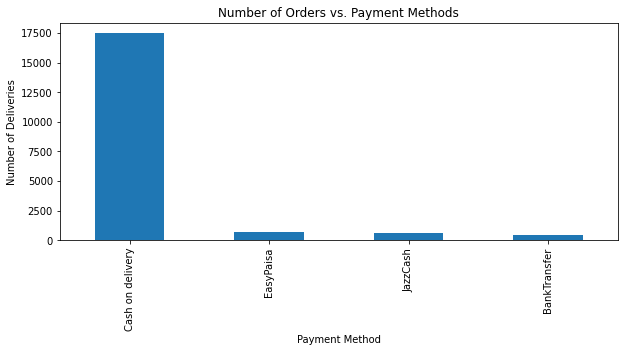

In [21]:
plt.figure(figsize = (10,4))
data.Payment_Method.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 90, horizontalalignment = "center")
plt.title("Number of Orders vs. Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number of Deliveries")
plt.show()

In [22]:
data['Book_Name'].value_counts().head(10)

انٹرنیٹ سے پیسہ کمائیں                    2579
python programming                        1888
blockchain, cryptocurrency and bitcoin    1067
product management                        1041
artificial intelligence                    900
justju ka safar-1                          881
ڈیٹا سائنس                                 702
lucky draw - free book                     487
molo masali                                422
column nigari kese sekhain                 418
Name: Book_Name, dtype: int64

In [23]:
# Since the book names were separated by " / " that is why I used split method to get name of all the books separately
book_data = data.Book_Name.apply(lambda x: str(x).split('/'))
# Storing the list of lists book names in a list 'books' 
books = [item for sublist in book_data for item in sublist]
# creating a new dataframe 'df' for ease in plotting the books sold
df = pd.DataFrame(data = books, columns = ['Books_Sold'])
# Only storing the top 10 most selling books of all times and converting the result into a datafram
book_chart = df.Books_Sold.value_counts().nlargest(10).to_frame()
# Printing the most sold book name and its number of times it was sold
print(book_chart.head(10))

                                        Books_Sold
انٹرنیٹ سے پیسہ کمائیں                        3507
python programming                            2808
artificial intelligence                       2104
blockchain, cryptocurrency and bitcoin        1905
product management                            1553
ڈیٹا سائنس                                    1548
justju ka safar-1                             1493
مشین لرننگ                                     848
sukkur to florida                              685
(c++)                                          654


In [24]:
# plotting 10 top selling books of all time
px.bar(book_chart, y = book_chart.Books_Sold, x = book_chart.index, title = 'Top 10 Selling Books')

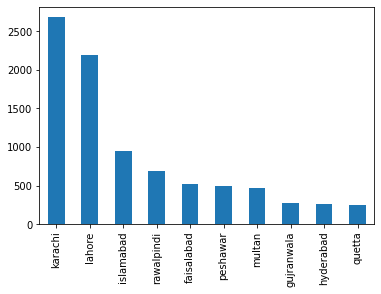

In [25]:
data.City_Order.str.upper().value_counts()[:10].to_frame()
visual_City_Order = data.City_Order.value_counts()[:10].plot.bar()